In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
csv_path = r"C:\Users\user\Downloads\top10k_logos.csv"
df = pd.read_csv(csv_path)
print(f"\nDataset Shape: {df.shape}")


Dataset Shape: (10000, 37)


In [5]:
import os

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
logo_dir = os.path.join(desktop_path, "logo_images")
os.makedirs(logo_dir, exist_ok=True)

print("Images will be saved to:", logo_dir)


Images will be saved to: C:\Users\user\Desktop\logo_images


In [7]:
import csv
import requests
import time
import os

"""
max_download = 10000
count = 0
with open(csv_path, newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        url  = (row.get("new_logo_url") or "").strip()
        name = (row.get("name") or "").strip()
        name = name.replace("/", "_")

        if not url:
            continue

        resp = None

        for attempt in range(3):
            try:
                resp = requests.get(url, timeout=5)
                if resp.status_code == 200:
                    break
            except requests.exceptions.RequestException:
                resp = None
            time.sleep(0.5)

        if resp and resp.status_code == 200:
            count += 1
            file_num = str(count).zfill(3)
            file_path = os.path.join(logo_dir, f"{file_num}_{name}.png")
            
            with open(file_path, "wb") as img_file:
                img_file.write(resp.content)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download: {name}")

        if max_download and count >= max_download:
            break

        time.sleep(0.2)

print(f"\nTotal downloaded: {count}")
print(f"Saved in: {logo_dir}")


SyntaxError: incomplete input (3506384815.py, line 6)

In [6]:
logo_dir = r"C:\Users\user\Desktop\logo_images"
available_logos = os.listdir(logo_dir) if os.path.exists(logo_dir) else []
print(f"\nTotal logos in /content/logo: {len(available_logos)}")
print(f"Expected logos from CSV: {len(df)}")
print(f"Match rate: {len(available_logos)/len(df)*100:.2f}%")


Total logos in /content/logo: 9998
Expected logos from CSV: 10000
Match rate: 99.98%


In [7]:
key_columns = ['name', 'category_list', 'logo_url', 'new_logo_url', 
               'founded_on', 'total_funding_usd', 'employee_count']
missing_data = df[key_columns].isnull().sum()
print(missing_data)

name                 0
category_list        0
logo_url             0
new_logo_url         0
founded_on           0
total_funding_usd    0
employee_count       0
dtype: int64



Total Unique Categories: 47

Top 20 Most Common Categories:
 1. Software                           :  5093 companies (50.93%)
 2. Financial Services                 :  2379 companies (23.79%)
 3. Information Technology             :  2308 companies (23.08%)
 4. Science and Engineering            :  2057 companies (20.57%)
 5. Internet Services                  :  2014 companies (20.14%)
 6. Data and Analytics                 :  1906 companies (19.06%)
 7. Health Care                        :  1725 companies (17.25%)
 8. Hardware                           :  1466 companies (14.66%)
 9. Other                              :  1377 companies (13.77%)
10. Commerce and Shopping              :  1371 companies (13.71%)
11. Artificial Intelligence            :  1098 companies (10.98%)
12. Mobile                             :  1074 companies (10.74%)
13. Lending and Investments            :   956 companies ( 9.56%)
14. Transportation                     :   901 companies ( 9.01%)
15. Media and E

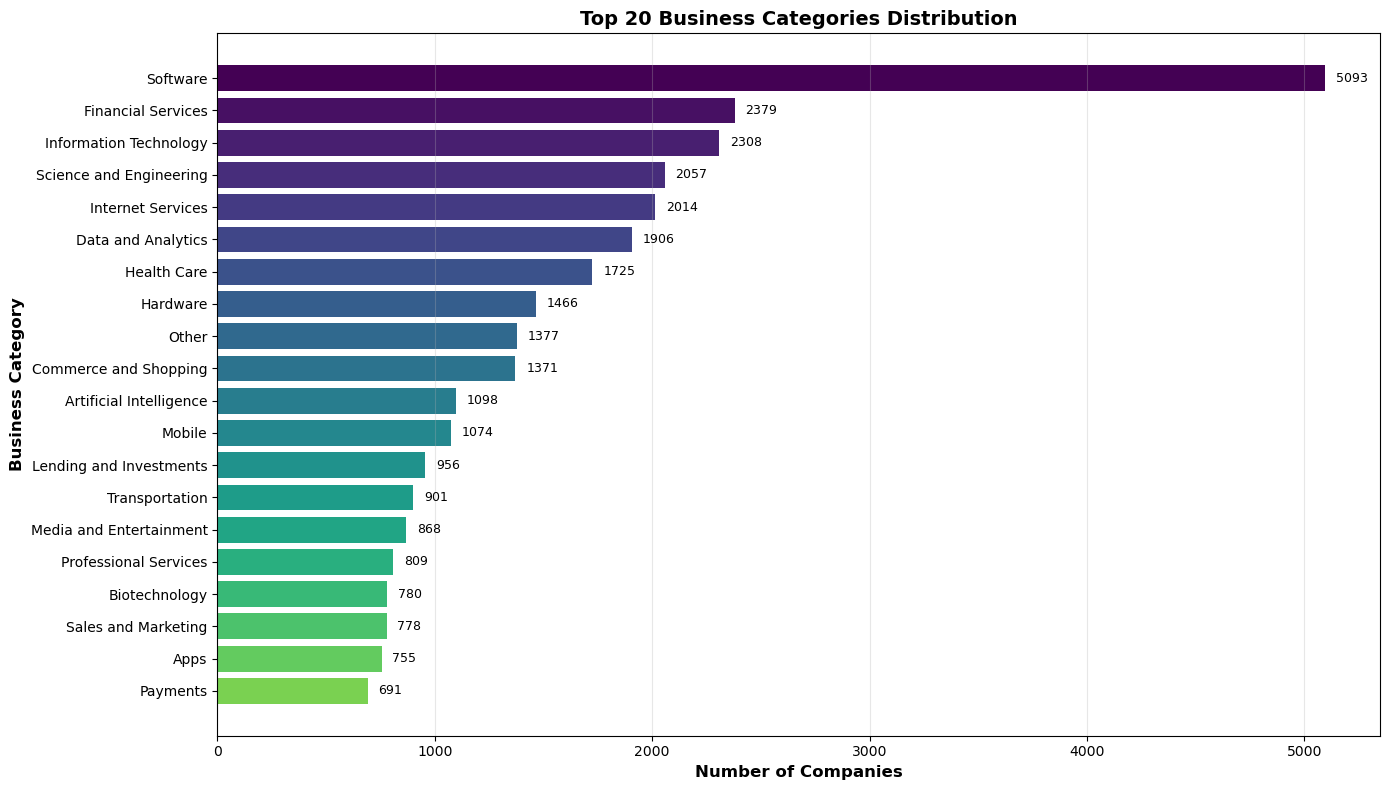

In [29]:
all_categories = []
for cat_str in df['category_groups_list'].dropna():
    # Split by comma and clean
    cats = [c.strip() for c in str(cat_str).split(',')]
    all_categories.extend(cats)

category_counts = Counter(all_categories)
top_20_categories = dict(category_counts.most_common(20))

print(f"\nTotal Unique Categories: {len(category_counts)}")
print(f"\nTop 20 Most Common Categories:")
for i, (cat, count) in enumerate(top_20_categories.items(), 1):
    percentage = count / len(df) * 100
    print(f"{i:2d}. {cat:35s}: {count:5d} companies ({percentage:5.2f}%)")

# Visualize category distribution - ONLY bar chart
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

categories = list(top_20_categories.keys())
counts = list(top_20_categories.values())
colors = plt.cm.viridis(np.linspace(0, 0.8, len(categories)))

ax.barh(categories, counts, color=colors)
ax.set_xlabel('Number of Companies', fontsize=12, fontweight='bold')
ax.set_ylabel('Business Category', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Business Categories Distribution', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (cat, count) in enumerate(zip(categories, counts)):
    ax.text(count + 50, i, str(count), va='center', fontsize=9)

plt.tight_layout()
plt.show()


Displaying 6 sample logos from different categories:
  1. Wellthy                        | Health Care               | USA
  2. Trulymadly.com                 | Apps                      | IND
  3. Illumio                        | Hardware                  | USA
  4. Optimove                       | Artificial Intelligence   | USA
  5. AirMap                         | Consumer Electronics      | USA
  6. Causal                         | Internet Services         | GBR


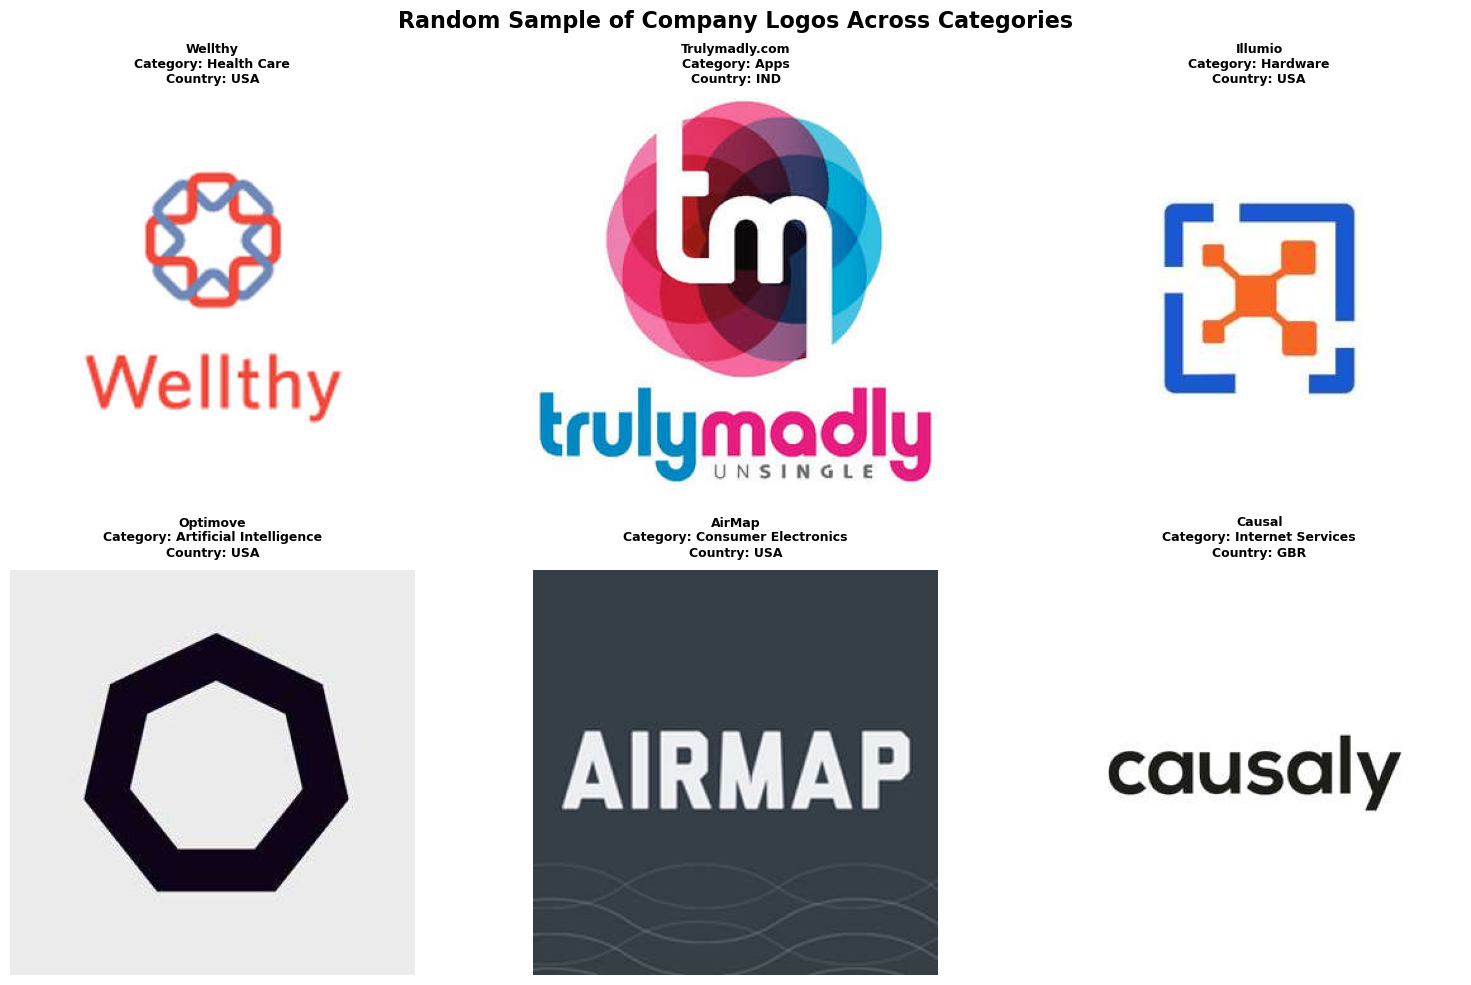

In [17]:
def find_logo_file(company_name, available_files):
    #Find logo file for a given company name
    company_normalized = company_name.replace(' ', '').replace('-', '').lower()
    for filename in available_files:
        file_normalized = filename.replace(' ', '').replace('-', '').lower()
        if company_normalized in file_normalized:
            return filename
    return None

# Select 6 random companies from different categories
sample_companies = []
sampled_categories = set()

# Try to get diverse category representation
for _, row in df.sample(frac=1, random_state=42).iterrows():
    if len(sample_companies) >= 6:
        break
    
    cat = str(row['category_groups_list']).split(',')[0].strip()
    logo_file = find_logo_file(row['name'], available_logos)
    
    if logo_file and cat not in sampled_categories:
        sample_companies.append({
            'name': row['name'],
            'category': cat,
            'file': logo_file,
            'country': row.get('country_code', 'N/A')
        })
        sampled_categories.add(cat)

print(f"\nDisplaying {len(sample_companies)} sample logos from different categories:")

# Display logos in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, (ax, company) in enumerate(zip(axes, sample_companies)):
    logo_path = os.path.join(logo_dir, company['file'])
    
    try:
        # Try to load image
        if company['file'].lower().endswith('.svg'):
            # For SVG files, show a placeholder
            ax.text(0.5, 0.5, f"{company['name']}\n(SVG file)", 
                   ha='center', va='center', fontsize=10)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
        else:
            img = Image.open(logo_path).convert('RGB')
            ax.imshow(img)
        
        ax.axis('off')
        
        # Add company info as title
        title = f"{company['name']}\n"
        title += f"Category: {company['category']}\n"
        title += f"Country: {company['country']}"
        ax.set_title(title, fontsize=9, fontweight='bold', pad=10)
        
        print(f"  {idx+1}. {company['name']:30s} | {company['category']:25s} | {company['country']}")
        
    except Exception as e:
        ax.text(0.5, 0.5, f"Error loading\n{company['name']}", 
               ha='center', va='center', fontsize=10)
        ax.axis('off')

plt.suptitle('Random Sample of Company Logos Across Categories', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [30]:
from scipy.ndimage import sobel
from scipy.stats import entropy as scipy_entropy

def extract_image_features(img_path, target_size=(64, 64)):
    """
    Extract visual features from logo image
    
    Features extracted:
    - Downsampled pixel values (color information)
    - RGB color histograms
    - Edge density and strength (shape information)
    
    Args:
        img_path: Path to image file
        target_size: Resize dimensions (width, height)
    
    Returns:
        numpy array of features, or None if error
    """
    try:
        # Skip SVG files for now (would need special handling)
        if img_path.lower().endswith('.svg'):
            return None
        
        # Load and preprocess image
        img = Image.open(img_path).convert('RGB')
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        
        # Feature 1: Downsampled pixel values (64x64x3 = 12,288 features)
        # Use only first 1000 to reduce dimensionality
        pixels_flat = img_array.flatten()[:1000]
        
        # Feature 2: Color histogram (32 bins per channel = 96 features)
        hist_r = np.histogram(img_array[:,:,0], bins=32, range=(0, 1))[0] / np.prod(target_size)
        hist_g = np.histogram(img_array[:,:,1], bins=32, range=(0, 1))[0] / np.prod(target_size)
        hist_b = np.histogram(img_array[:,:,2], bins=32, range=(0, 1))[0] / np.prod(target_size)
        color_hist = np.concatenate([hist_r, hist_g, hist_b])
        
        # Feature 3: Edge information (4 features)
        gray = np.mean(img_array, axis=2)
        edges = np.sqrt(sobel(gray, axis=0)**2 + sobel(gray, axis=1)**2)
        edge_features = [
            np.mean(edges),      # Average edge strength
            np.std(edges),       # Edge variance
            np.max(edges),       # Maximum edge
            (edges > 0.1).sum() / edges.size  # Edge density
        ]
        
        # Combine all features
        features = np.concatenate([pixels_flat, color_hist, edge_features])
        return features
        
    except Exception as e:
        print(f"  Error processing {img_path}: {e}")
        return None


print("\nExtracting features from all available logos...")
print("This may take several minutes depending on dataset size...")

# Extract features for ALL logos
features_list = []
logo_info = []  # Store corresponding company info
processed_count = 0
error_count = 0

for i, logo_file in enumerate(available_logos):
    if i % 500 == 0 and i > 0:
        print(f"  Processed {i}/{len(available_logos)} logos... (errors: {error_count})")
    
    logo_path = os.path.join(logo_dir, logo_file)
    features = extract_image_features(logo_path)
    
    if features is not None:
        features_list.append(features)
        
        # Try to match with company data
        company_name = logo_file.split('_', 1)[1].rsplit('.', 1)[0] if '_' in logo_file else logo_file.rsplit('.', 1)[0]
        
        # Find matching row in dataframe
        match = df[df['name'].str.replace(' ', '').str.lower() == company_name.replace(' ', '').lower()]
        
        if len(match) > 0:
            cat_str = match.iloc[0]['category_groups_list']
            primary_cat = str(cat_str).split(',')[0].strip() if pd.notna(cat_str) else 'Unknown'
        else:
            primary_cat = 'Unknown'
        
        logo_info.append({
            'filename': logo_file,
            'company': company_name,
            'category': primary_cat
        })
        processed_count += 1
    else:
        error_count += 1

features_array = np.array(features_list)
logo_info_df = pd.DataFrame(logo_info)

print(f"\nFeature extraction complete!")
print(f"  Successfully processed: {processed_count} logos")
print(f"  Errors/skipped: {error_count} logos")
print(f"  Feature matrix shape: {features_array.shape}")
print(f"  Feature vector length per logo: {features_array.shape[1]}")


Extracting features from all available logos...
This may take several minutes depending on dataset size...
  Error processing C:\Users\user\Desktop\logo_images\1055_CleverTap.png: cannot identify image file 'C:\\Users\\user\\Desktop\\logo_images\\1055_CleverTap.png'
  Error processing C:\Users\user\Desktop\logo_images\1245_ELEMENT Insurance.png: cannot identify image file 'C:\\Users\\user\\Desktop\\logo_images\\1245_ELEMENT Insurance.png'
  Error processing C:\Users\user\Desktop\logo_images\1284_Color.png: cannot identify image file 'C:\\Users\\user\\Desktop\\logo_images\\1284_Color.png'
  Error processing C:\Users\user\Desktop\logo_images\1319_OODA Health.png: cannot identify image file 'C:\\Users\\user\\Desktop\\logo_images\\1319_OODA Health.png'
  Error processing C:\Users\user\Desktop\logo_images\1321_StarkWare Industries.png: cannot identify image file 'C:\\Users\\user\\Desktop\\logo_images\\1321_StarkWare Industries.png'
  Processed 500/9998 logos... (errors: 5)
  Error processi


Analyzing RGB color distributions for top 3 categories:
  1. Software: 5093 companies
  2. Financial Services: 2379 companies
  3. Information Technology: 2308 companies



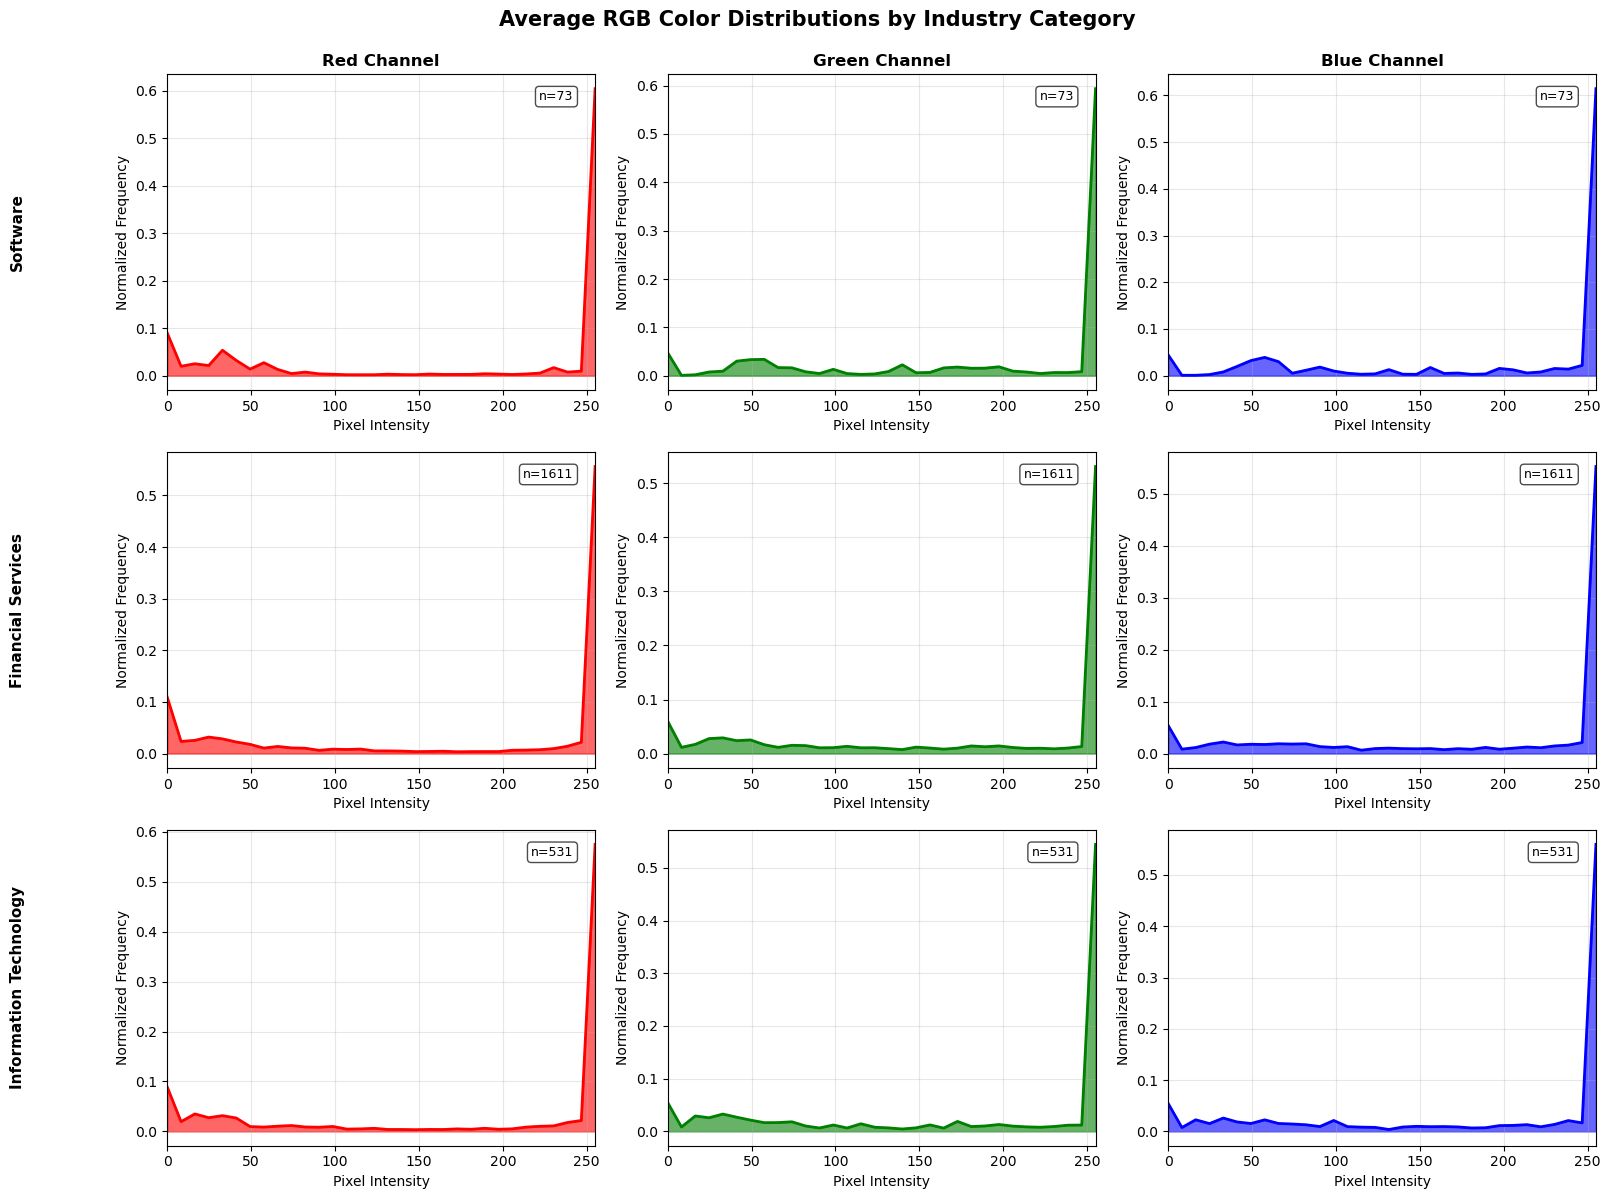


Color histogram analysis complete:
  Software: 73 logos analyzed
  Financial Services: 1611 logos analyzed
  Information Technology: 531 logos analyzed
                         mean_r  mean_g  mean_b  brightness
category                                                   
Financial Services       174.62  180.50  188.34      181.15
Commerce and Shopping    179.93  178.92  180.68      179.85
Artificial Intelligence  179.74  183.31  190.97      184.67
Apps                     168.52  167.83  173.82      170.06
Biotechnology            210.53  214.45  218.53      214.50
Information Technology   180.85  181.26  188.02      183.38
Administrative Services  178.37  178.92  185.42      180.90
Data and Analytics       179.15  182.93  191.77      184.62
Health Care              194.30  204.24  210.57      203.03
Consumer Electronics     168.61  173.36  179.59      173.85


In [33]:
# Select top 3 categories for detailed color histogram analysis
top_3_cats = list(top_20_categories.keys())[:3]
print(f"\nAnalyzing RGB color distributions for top 3 categories:")
for i, cat in enumerate(top_3_cats, 1):
    count = top_20_categories[cat]
    print(f"  {i}. {cat}: {count} companies")

def get_rgb_histograms(img_path, bins=32):
    """Extract separate RGB histograms from image"""
    try:
        if img_path.lower().endswith('.svg'):
            return None, None, None
        
        img = Image.open(img_path).convert('RGB')
        img = img.resize((100, 100))
        img_array = np.array(img)
        
        hist_r = np.histogram(img_array[:,:,0], bins=bins, range=(0, 256))[0]
        hist_g = np.histogram(img_array[:,:,1], bins=bins, range=(0, 256))[0]
        hist_b = np.histogram(img_array[:,:,2], bins=bins, range=(0, 256))[0]
        
        # Normalize
        hist_r = hist_r / hist_r.sum()
        hist_g = hist_g / hist_g.sum()
        hist_b = hist_b / hist_b.sum()
        
        return hist_r, hist_g, hist_b
    except:
        return None, None, None

# Collect color histograms for each category
category_color_data = {cat: {'r': [], 'g': [], 'b': []} for cat in top_3_cats}

print("\nCollecting color histogram data...")
for _, row in logo_info_df.iterrows():
    if row['category'] in top_3_cats:
        logo_path = os.path.join(logo_dir, row['filename'])
        hist_r, hist_g, hist_b = get_rgb_histograms(logo_path)
        
        if hist_r is not None:
            category_color_data[row['category']]['r'].append(hist_r)
            category_color_data[row['category']]['g'].append(hist_g)
            category_color_data[row['category']]['b'].append(hist_b)

# Plot average color distributions (3 categories x 3 color channels)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
channel_names = ['Red Channel', 'Green Channel', 'Blue Channel']
channel_colors = ['red', 'green', 'blue']

for cat_idx, category in enumerate(top_3_cats):
    for ch_idx, (channel, color) in enumerate(zip(['r', 'g', 'b'], channel_colors)):
        ax = axes[cat_idx, ch_idx]
        
        if len(category_color_data[category][channel]) > 0:
            # Calculate mean histogram across all logos in category
            mean_hist = np.mean(category_color_data[category][channel], axis=0)
            x = np.linspace(0, 255, len(mean_hist))
            
            ax.fill_between(x, mean_hist, alpha=0.6, color=color)
            ax.plot(x, mean_hist, color=color, linewidth=2)
            ax.set_xlim(0, 255)
            ax.set_xlabel('Pixel Intensity', fontsize=10)
            ax.set_ylabel('Normalized Frequency', fontsize=10)
            ax.grid(True, alpha=0.3)
            
            # Add title only to top row
            if cat_idx == 0:
                ax.set_title(channel_names[ch_idx], fontsize=12, fontweight='bold')
            
            # Add category label to leftmost column
            if ch_idx == 0:
                ax.text(-0.35, 0.5, category, transform=ax.transAxes,
                       fontsize=11, fontweight='bold', rotation=90,
                       va='center', ha='center')
            
            # Add sample size
            n = len(category_color_data[category][channel])
            ax.text(0.95, 0.95, f'n={n}', transform=ax.transAxes,
                   fontsize=9, ha='right', va='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.suptitle('Average RGB Color Distributions by Industry Category',
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nColor histogram analysis complete:")
for cat in top_3_cats:
    n = len(category_color_data[cat]['r'])
    if n > 0:
        print(f"  {cat}: {n} logos analyzed")
print(avg_colors_top10.round(2))


Calculating texture and shape metrics for all logos...
  Processed 500/9948 logos...
  Processed 1000/9948 logos...
  Processed 1500/9948 logos...
  Processed 2000/9948 logos...
  Processed 2500/9948 logos...
  Processed 3000/9948 logos...
  Processed 3500/9948 logos...
  Processed 4000/9948 logos...
  Processed 4500/9948 logos...
  Processed 5000/9948 logos...
  Processed 5500/9948 logos...
  Processed 6000/9948 logos...
  Processed 6500/9948 logos...
  Processed 7000/9948 logos...
  Processed 7500/9948 logos...
  Processed 8000/9948 logos...
  Processed 8500/9948 logos...
  Processed 9000/9948 logos...
  Processed 9500/9948 logos...

Calculated metrics for 9948 logos
OVERALL TEXTURE AND SHAPE STATISTICS:
         entropy  edge_density  edge_strength  color_diversity  brightness  \
count  9948.0000     9948.0000      9948.0000        9948.0000   9948.0000   
mean      1.5491        0.1527         0.2094           0.2064      0.7212   
std       0.7557        0.0728         0.1088    

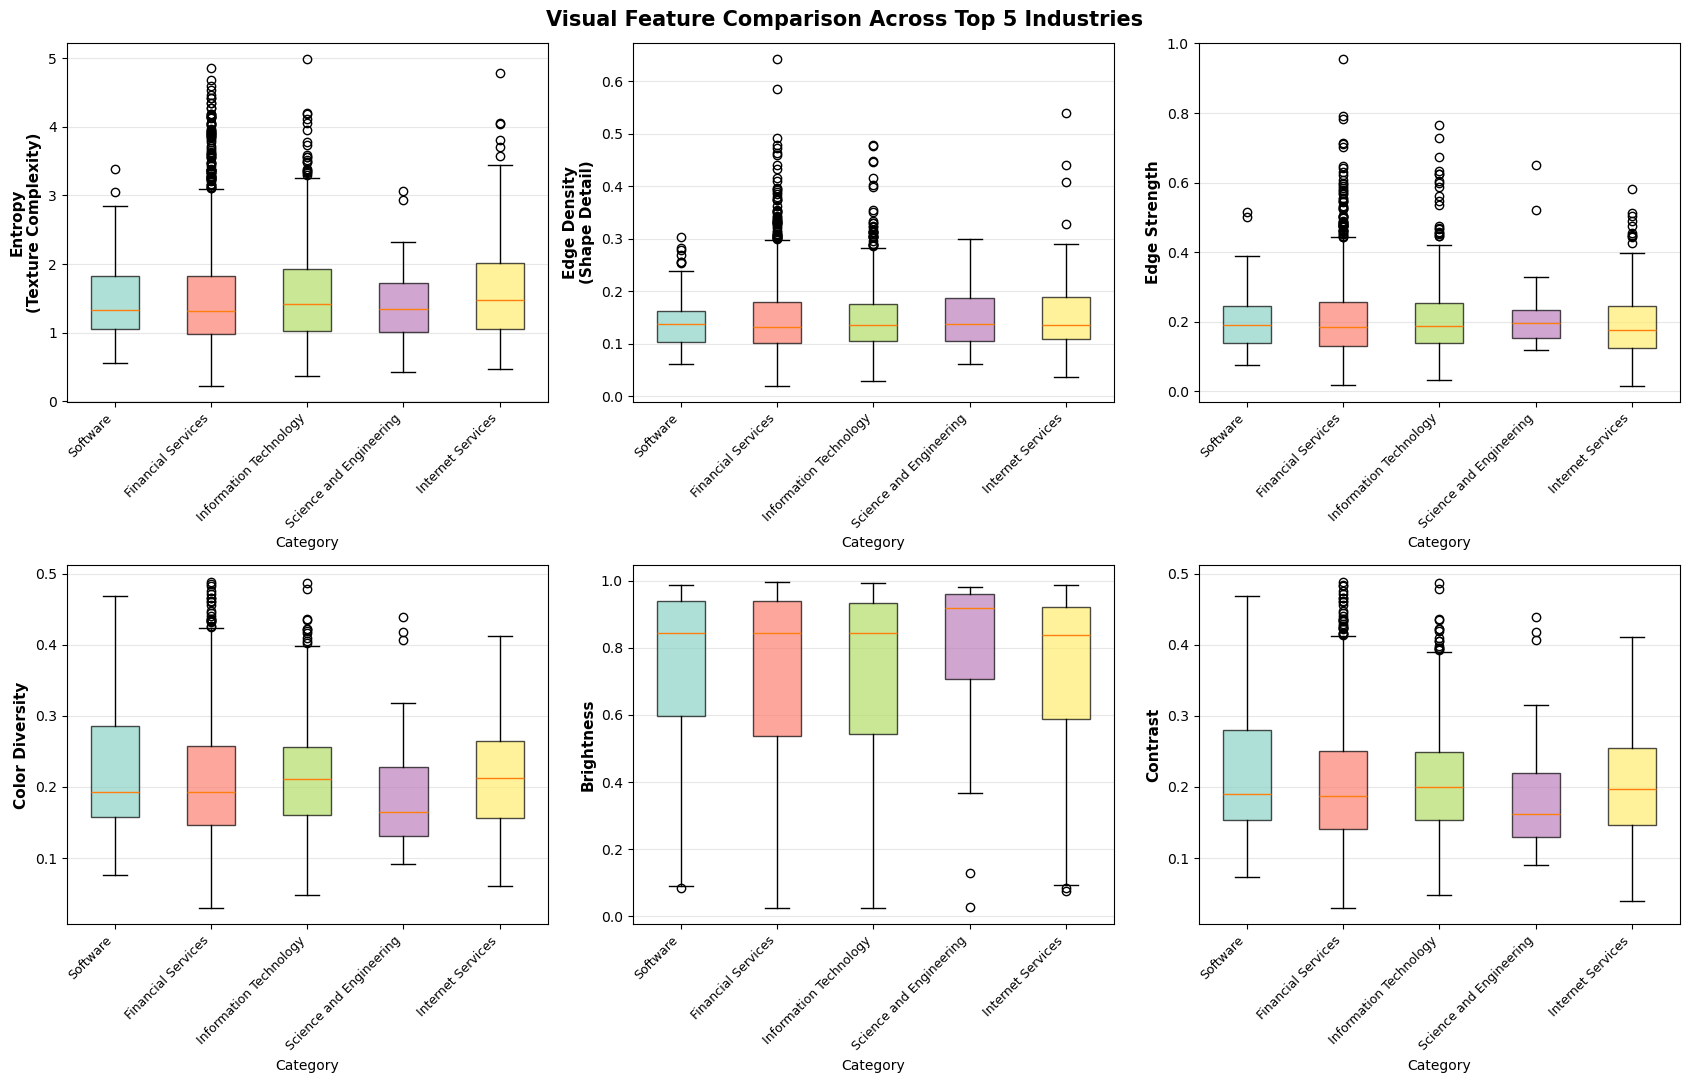

In [53]:
def calculate_texture_metrics(img_path):
    """
    Metrics:
    - Entropy: Texture complexity/randomness
    - Edge density: Amount of edges (shape complexity)
    - Edge strength: Average edge intensity
    - Color diversity: Standard deviation across RGB channels
    - Brightness: Average pixel intensity
    - Contrast: Pixel intensity variation
    
    """
    try:
        if img_path.lower().endswith('.svg'):
            return None
        
        img = Image.open(img_path).convert('RGB')
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        
        # Convert to grayscale for some metrics
        gray = np.mean(img_array, axis=2)
        
        # Metric 1: Entropy (texture complexity)
        hist, _ = np.histogram(gray, bins=256, range=(0, 1))
        hist = hist / (hist.sum() + 1e-10)
        img_entropy = scipy_entropy(hist + 1e-10)
        
        # Metric 2: Edge density and strength (shape complexity)
        edges_x = sobel(gray, axis=0)
        edges_y = sobel(gray, axis=1)
        edges = np.sqrt(edges_x**2 + edges_y**2)
        edge_density = (edges > 0.1).sum() / edges.size
        edge_strength = np.mean(edges)
        
        # Metric 3: Color diversity
        color_std = np.mean([np.std(img_array[:,:,i]) for i in range(3)])
        
        # Metric 4: Brightness and contrast
        brightness = np.mean(gray)
        contrast = np.std(gray)
        
        return {
            'entropy': img_entropy,
            'edge_density': edge_density,
            'edge_strength': edge_strength,
            'color_diversity': color_std,
            'brightness': brightness,
            'contrast': contrast
        }
    except:
        return None

print("\nCalculating texture and shape metrics for all logos...")
metrics_list = []

for i, row in logo_info_df.iterrows():
    if i % 500 == 0 and i > 0:
        print(f"  Processed {i}/{len(logo_info_df)} logos...")
    
    logo_path = os.path.join(logo_dir, row['filename'])
    metrics = calculate_texture_metrics(logo_path)
    
    if metrics is not None:
        metrics['company'] = row['company']
        metrics['category'] = row['category']
        metrics_list.append(metrics)

metrics_df = pd.DataFrame(metrics_list)

print(f"\nCalculated metrics for {len(metrics_df)} logos")

# Display overall statistics
print("OVERALL TEXTURE AND SHAPE STATISTICS:")
metric_cols = ['entropy', 'edge_density', 'edge_strength', 'color_diversity', 'brightness', 'contrast']
print(metrics_df[metric_cols].describe().round(4))

# Compare metrics across top 5 categories
top_5_cats_metrics = list(top_20_categories.keys())[:5]
metrics_top5 = metrics_df[metrics_df['category'].isin(top_5_cats_metrics)]

print(f"COMPARING TOP 5 CATEGORIES:")
for cat in top_5_cats_metrics:
    n = len(metrics_top5[metrics_top5['category'] == cat])
    print(f"  {cat:35s}: {n:4d} logos")

# Visualize metrics by category
fig, axes = plt.subplots(2, 3, figsize=(17, 11))
axes = axes.flatten()

metric_names = ['entropy', 'edge_density', 'edge_strength', 
                'color_diversity', 'brightness', 'contrast']
metric_titles = ['Entropy\n(Texture Complexity)', 'Edge Density\n(Shape Detail)', 
                'Edge Strength', 'Color Diversity', 'Brightness', 'Contrast']

for idx, (metric, title) in enumerate(zip(metric_names, metric_titles)):
    ax = axes[idx]
    
    # Prepare data for boxplot
    data_by_cat = [metrics_top5[metrics_top5['category'] == cat][metric].values
                   for cat in top_5_cats_metrics]
    
    # Create boxplot
    bp = ax.boxplot(data_by_cat, labels=top_5_cats_metrics, patch_artist=True)
    
    # Color boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_5_cats_metrics)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_xlabel('Category', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Make x-axis labels more readable
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('Visual Feature Comparison Across Top 5 Industries',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


PCA Results:
  Input features: 1100
  PCA components: 50
  Transformed shape: (9948, 50)

Explained Variance by First 10 Components:
  PC 1:  74.36% (cumulative:  74.36%)
  PC 2:   9.10% (cumulative:  83.47%)
  PC 3:   2.54% (cumulative:  86.00%)
  PC 4:   2.21% (cumulative:  88.21%)
  PC 5:   0.53% (cumulative:  88.74%)
  PC 6:   0.37% (cumulative:  89.11%)
  PC 7:   0.30% (cumulative:  89.42%)
  PC 8:   0.29% (cumulative:  89.71%)
  PC 9:   0.22% (cumulative:  89.93%)
  PC10:   0.21% (cumulative:  90.14%)

  Total variance explained by 50 components: 94.73%


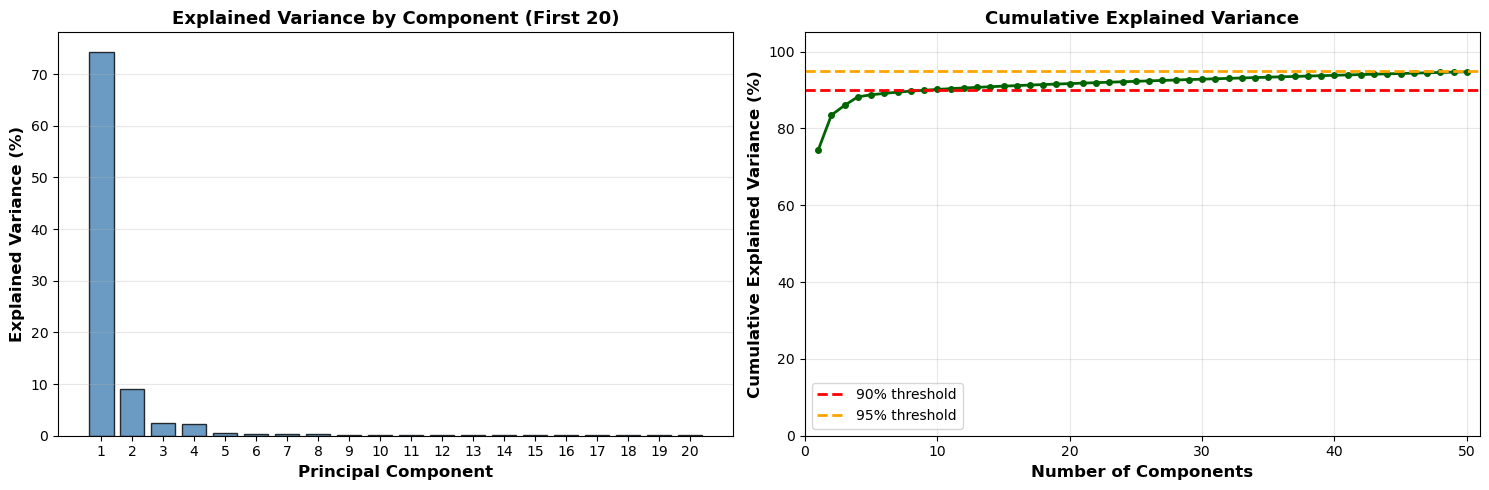

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features (important for PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_array)

# Apply PCA
n_components = 50
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(features_scaled)

print(f"\nPCA Results:")
print(f"  Input features: {features_scaled.shape[1]}")
print(f"  PCA components: {n_components}")
print(f"  Transformed shape: {pca_result.shape}")

print(f"\nExplained Variance by First 10 Components:")
for i in range(10):
    var = pca.explained_variance_ratio_[i] * 100
    cum_var = np.sum(pca.explained_variance_ratio_[:i+1]) * 100
    print(f"  PC{i+1:2d}: {var:6.2f}% (cumulative: {cum_var:6.2f}%)")

total_var = np.sum(pca.explained_variance_ratio_) * 100
print(f"\n  Total variance explained by {n_components} components: {total_var:.2f}%")

# Visualize PCA results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Explained variance per component
components_range = range(1, 21)
ax1.bar(components_range, pca.explained_variance_ratio_[:20] * 100, 
        color='steelblue', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Explained Variance (%)', fontsize=12, fontweight='bold')
ax1.set_title('Explained Variance by Component (First 20)', 
             fontsize=13, fontweight='bold')
ax1.set_xticks(components_range)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Cumulative explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_) * 100
ax2.plot(range(1, n_components+1), cumsum, marker='o', 
        linewidth=2, markersize=4, color='darkgreen')
ax2.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90% threshold')
ax2.axhline(y=95, color='orange', linestyle='--', linewidth=2, label='95% threshold')
ax2.set_xlabel('Number of Components', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Explained Variance (%)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Explained Variance', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_xlim(0, n_components+1)
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.show()



Top 10 categories for t-SNE coloring:
   1. Financial Services                 :  1611 logos
   2. Commerce and Shopping              :   936 logos
   3. Artificial Intelligence            :   922 logos
   4. Apps                               :   692 logos
   5. Biotechnology                      :   680 logos
   6. Information Technology             :   531 logos
   7. Administrative Services            :   486 logos
   8. Data and Analytics                 :   481 logos
   9. Health Care                        :   406 logos
  10. Consumer Electronics               :   397 logos

Note: Dataset has 9948 samples.
      Using random subset of 5000 for t-SNE (computational efficiency)

Running t-SNE on 5000 logos...
  Using first 50 PCA components as input
  Parameters: perplexity=30, n_iter=1000
  This may take a few minutes...


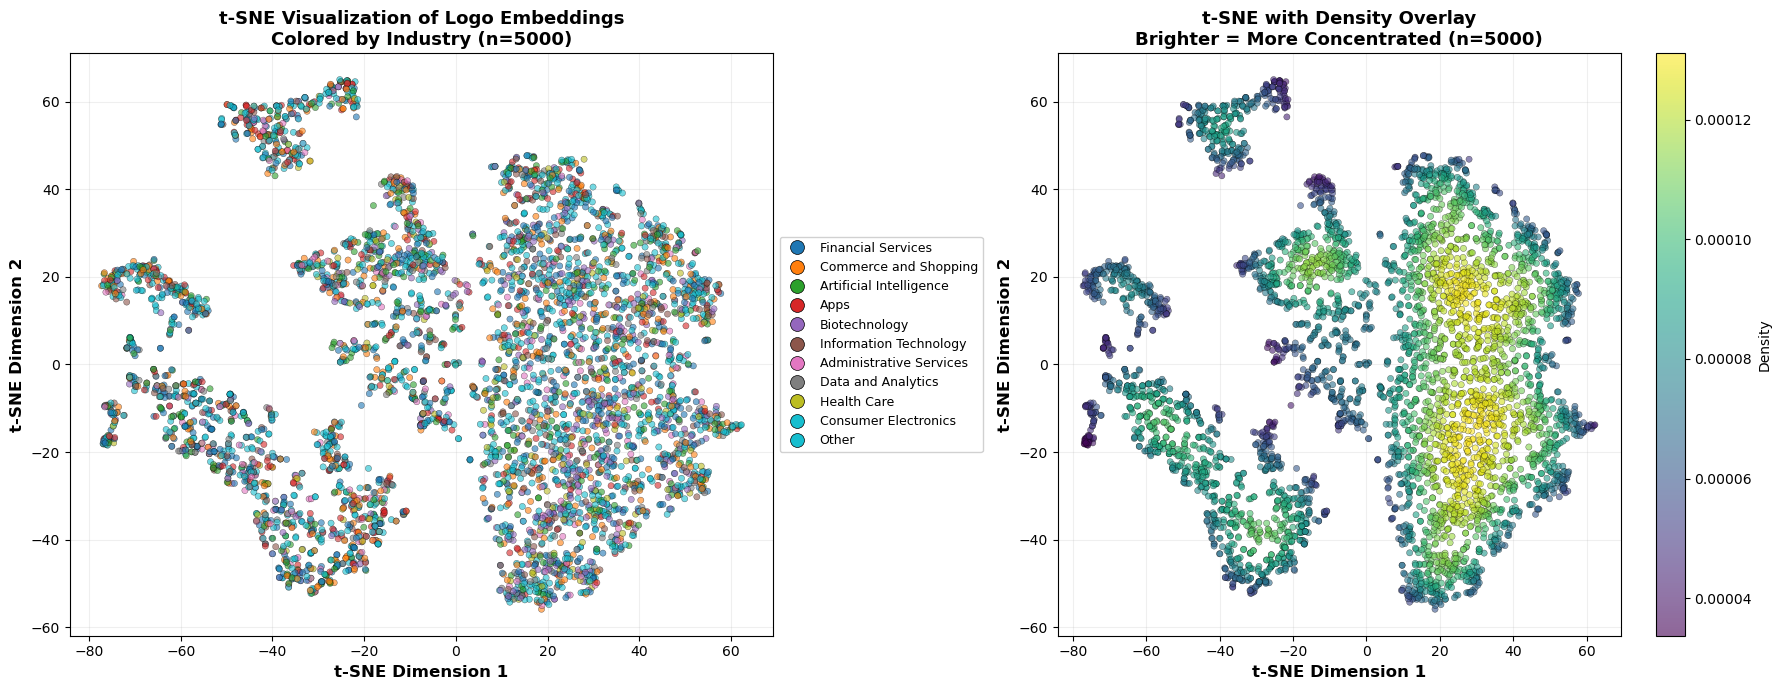

In [43]:
from sklearn.manifold import TSNE

# Prepare category colors for visualization
# Map each category to a color
unique_categories = logo_info_df['category'].value_counts().index.tolist()
top_10_for_tsne = unique_categories[:10]

def assign_category_color(cat):
    """Assign color index to category (top 10 get unique colors, rest are 'Other')"""
    if cat in top_10_for_tsne:
        return top_10_for_tsne.index(cat)
    else:
        return 10  # 'Other' category

category_colors = [assign_category_color(cat) for cat in logo_info_df['category']]

print(f"\nTop 10 categories for t-SNE coloring:")
for i, cat in enumerate(top_10_for_tsne, 1):
    count = (logo_info_df['category'] == cat).sum()
    print(f"  {i:2d}. {cat:35s}: {count:5d} logos")

# Determine sample size for t-SNE (it's computationally expensive)
n_samples = len(pca_result)
if n_samples > 5000:
    print(f"\nNote: Dataset has {n_samples} samples.")
    print(f"      Using random subset of 5000 for t-SNE (computational efficiency)")
    subset_indices = np.random.choice(n_samples, size=5000, replace=False)
    tsne_input = pca_result[subset_indices, :50]  # Use first 50 PCA components
    tsne_colors = [category_colors[i] for i in subset_indices]
    tsne_categories = [logo_info_df.iloc[i]['category'] for i in subset_indices]
else:
    tsne_input = pca_result[:, :50]
    tsne_colors = category_colors
    tsne_categories = logo_info_df['category'].tolist()

print(f"\nRunning t-SNE on {len(tsne_input)} logos...")
print("  Using first 50 PCA components as input")
print("  Parameters: perplexity=30, n_iter=1000")
print("  This may take a few minutes...")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=0)
tsne_result = tsne.fit_transform(tsne_input)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Colored by category
scatter = ax1.scatter(tsne_result[:, 0], tsne_result[:, 1],
                     c=tsne_colors, cmap='tab10', 
                     alpha=0.6, s=20, edgecolors='black', linewidth=0.3)
ax1.set_xlabel('t-SNE Dimension 1', fontsize=12, fontweight='bold')
ax1.set_ylabel('t-SNE Dimension 2', fontsize=12, fontweight='bold')
ax1.set_title(f't-SNE Visualization of Logo Embeddings\nColored by Industry (n={len(tsne_result)})',
             fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.2)

# Create custom legend
legend_labels = top_10_for_tsne + ['Other']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=plt.cm.tab10(i/10),
                             markersize=10, label=legend_labels[i],
                             markeredgecolor='black', markeredgewidth=0.5)
                  for i in range(len(legend_labels))]
ax1.legend(handles=legend_elements, loc='center left',
          bbox_to_anchor=(1, 0.5), fontsize=9, framealpha=0.9)

# Plot 2: Density heatmap
from scipy.stats import gaussian_kde
xy = tsne_result.T
density = gaussian_kde(xy)(xy)
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1],
                      c=density, cmap='viridis',
                      alpha=0.6, s=20, edgecolors='black', linewidth=0.3)
ax2.set_xlabel('t-SNE Dimension 1', fontsize=12, fontweight='bold')
ax2.set_ylabel('t-SNE Dimension 2', fontsize=12, fontweight='bold')
ax2.set_title(f't-SNE with Density Overlay\nBrighter = More Concentrated (n={len(tsne_result)})',
             fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.2)
plt.colorbar(scatter2, ax=ax2, label='Density')

plt.tight_layout()
plt.show()